In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
from nltk.stem import PorterStemmer

# READING DATASETS

In [3]:
email_data = pd.read_csv('C:/Users/Data Analysisp2.2/emails.csv.zip', compression="zip")

In [4]:
email_data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
email_data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [21]:
email_data.shape

(5726, 3)

there are total 5727 rows ans 2 columns

In [6]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
email_data.columns

Index(['text', 'spam'], dtype='object')

# CLEANING 

In [29]:
nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def clean_text(text):
    text = re.sub(r'^Subject:\s*', '', text, flags=re.IGNORECASE)
    text = text.lower()  
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'<.*?>+', '', text) 
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub(r'\n', '', text)  
    text = re.sub(r'\w*\d\w*', '', text)  
    return text

email_data['text'] = email_data['text'].apply(clean_text)



In [9]:
email_data.head()

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,color printing special request additional in...,1
4,do not have money get software cds from here ...,1


Finding missing values

In [11]:
missing_values = email_data.isnull().sum()

In [12]:
missing_values[missing_values > 0]

Series([], dtype: int64)

# Finding duplicate values

In [13]:
duplicate_rows = email_data.duplicated().sum()

In [14]:
#length of the text
email_data['text_length'] = email_data['text'].apply(len)

In [15]:
email_data.head()

,text,spam,text_length
0,naturally irresistible your corporate identity...,1,1337
1,the stock trading gunslinger fanny is merrill...,1,589
2,unbelievable new homes made easy im wanting t...,1,422
3,color printing special request additional in...,1,437
4,do not have money get software cds from here ...,1,214


In [20]:
email_data.duplicated().sum()

42

In [23]:
#handle all duplicate values
duplicate=email_data[email_data.duplicated(keep='last')]
duplicate.head(42)

,text,spam,text_length
663,returned mail see transcript for details the...,1,263
1417,day off tuesday stinson i would like to tak...,0,223
1508,re enron weather research good afternoon mik...,0,1410
1532,schedule and more dr kaminski i think i ...,0,1557
1667,re summer work jinbaek this is a project...,0,3235
1749,term paper dr kaminski attached please fin...,0,176
1760,re new business h lyette i am working sys...,0,713
1791,re contact info glenn please contact rudi...,0,1393
1801,departure of grant masson the research group ...,0,714
1828,re term project brian no problem vince ...,0,2484


In [27]:
#Remove Duplicate Records
email_data = email_data.drop_duplicates()

Tokenization and stemming function

In [66]:
def tokenize_and_stem(text):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Clean and process the email text
email_data['text'] = email_data['text'].apply(clean_text).apply(tokenize_and_stem)

In [69]:
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the email texts
tfidf_features = vectorizer.fit_transform(email_data['text'])


In [68]:
email_data.head(1000)

,text,spam,text_length
0,natur irresist corpor ident lt realli hard rec...,1,757
1,stock trade gunsl fanni merril muzo colza atta...,1,450
2,unbeliev new home made easi im want show homeo...,1,231
3,color print special request addit inform click...,1,282
4,money get softwar cd softwar compat great grow...,1,107
...,...,...,...
996,softwar system builder resel hardwar purcha ge...,1,132
997,fantast investor info maisonett intern enterpr...,1,1958
998,save money buy get thing tri ciall yet cannot ...,1,219
999,percent life insur get free quot instant quest...,1,934


# MODEL TRAINING AND EVALUATION
1.DATA PREPARATION

In [37]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(email_data['text'])
y = email_data['spam']

TRAIN SPLIT

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}


MODEL EVALUATION 

In [53]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Naive Bayes          0.981530   0.992832  0.935811  0.963478
Logistic Regression  0.986807   0.992982  0.956081  0.974182
SVM                  0.990325   0.993080  0.969595  0.981197
Random Forest        0.978012   0.996337  0.918919  0.956063


Implementing the Filter

In [44]:
# Assuming Logistic Regression is the best model based on results
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

def predict_email(text):
    processed_text = tokenize_and_stem(clean_text(text))
    vectorized_text = vectorizer.transform([processed_text])
    prediction = best_model.predict(vectorized_text)
    return 'Spam' if prediction[0] == 1 else 'Ham'
new_email = "Subject: get rich quick by investing in our new scheme"
print(predict_email(new_email))

Spam


# VISUALISATION

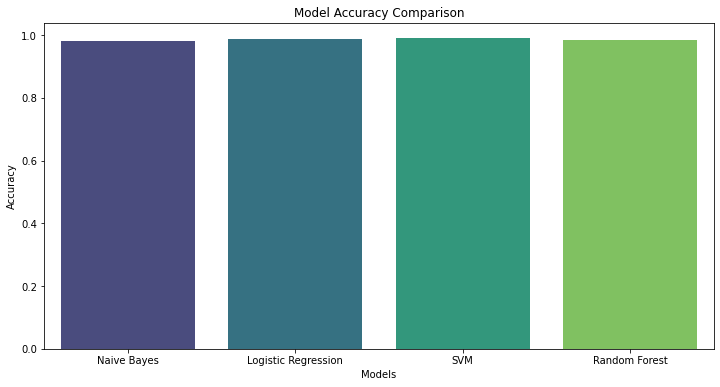

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

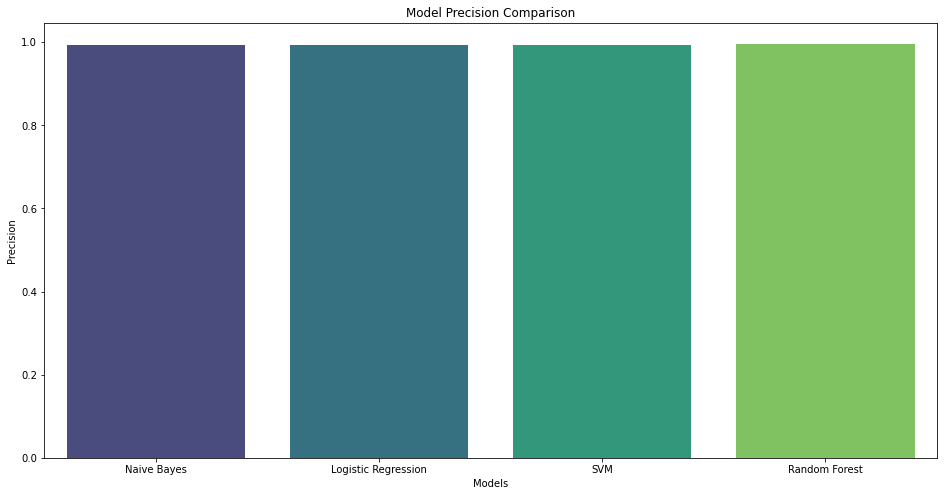

In [48]:
plt.figure(figsize=(16, 8))
sns.barplot(x=results_df.index, y=results_df['Precision'], palette='viridis')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Models')
plt.show()

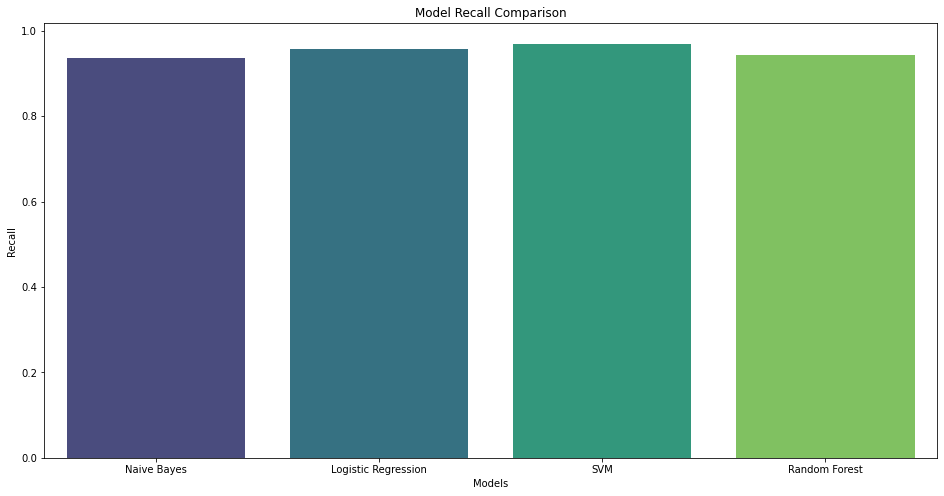

In [49]:
plt.figure(figsize=(16, 8))
sns.barplot(x=results_df.index, y=results_df['Recall'], palette='viridis')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Models')
plt.show()


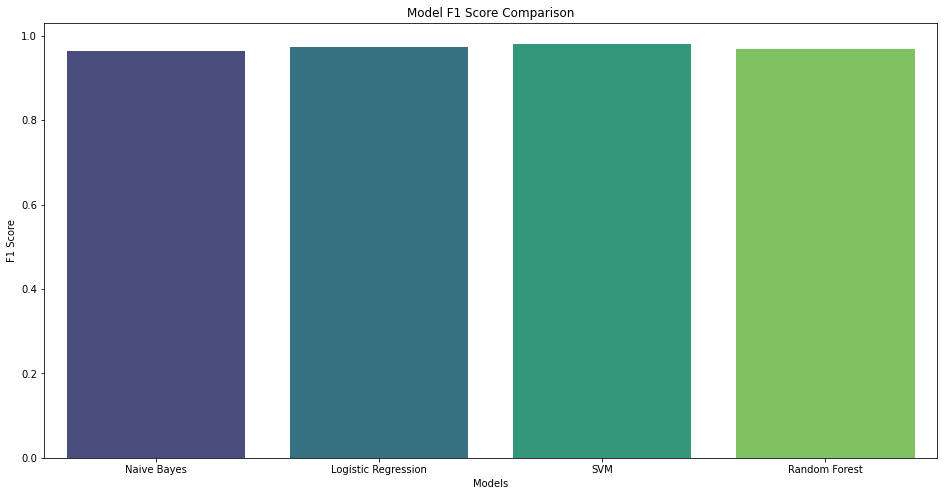

In [50]:
plt.figure(figsize=(16, 8))
sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='viridis')
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xlabel('Models')
plt.show()

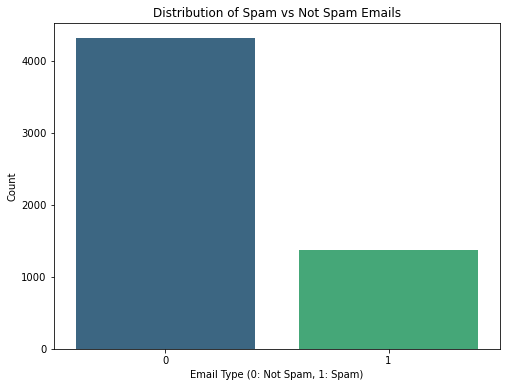

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=email_data, palette='viridis')
plt.title('Distribution of Spam vs Not Spam Emails')
plt.xlabel('Email Type (0: Not Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

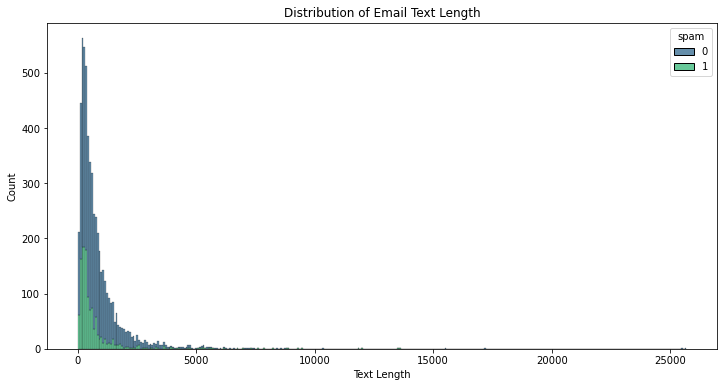

In [47]:
email_data['text_length'] = email_data['text'].apply(len)

# the distribution of text length for spam and not spam emails
plt.figure(figsize=(12, 6))
sns.histplot(data=email_data, x='text_length', hue='spam', multiple='stack', palette='viridis')
plt.title('Distribution of Email Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [54]:
import joblib

# Save the model
joblib.dump(best_model, 'spam_classifier_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [55]:
loaded_model = joblib.load('spam_classifier_model.pkl')

# Load the vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to predict whether an email is spam or ham using loaded model
def predict_email_with_loaded_model(text):
    processed_text = tokenize_and_stem(clean_text(text))
    vectorized_text = loaded_vectorizer.transform([processed_text])
    prediction = loaded_model.predict(vectorized_text)
    return 'Spam' if prediction[0] == 1 else 'Ham'

# Example usage
new_email = "Subject: congratulations! you've won a prize"
print(predict_email_with_loaded_model(new_email))

Ham


# Process Overview

Text Preprocessing:
The email text is cleaned and processed.

Vectorization: The processed text is transformed into a numerical representation using TF-IDF.

Model Prediction: The vectorized text is passed through a trained machine learning model to get the prediction.

Output: The system outputs whether the email is classified as spam or ham based on the model's prediction.

This comprehensive approach ensures that the system can effectively distinguish between spam and ham emails based on the learned patterns from the training data.

In [60]:
print("END!")

END!
